# Lecture 3 数据处理和可视化

## [Matplotlib](https://matplotlib.org/stable/#)

### 简介


matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）。    
该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。
matplotlib和IPython社区进行合作，简化了从IPython shell（包括现在的Jupyter notebook）进行交互式绘图。
matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、GIF等。

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### 一个简单的例子

`matplotlib`可以将你的数据呈现于图`Figure`对象上，而`Figure`对象往往包含一个或者多个轴域`Axes`对象。   
最简单的一种画图方式是通过`plt.subplots`创建`Figure`和`Axes`对象，然后通过`Axes.plot`函数将数据画于`Axes`轴域上。

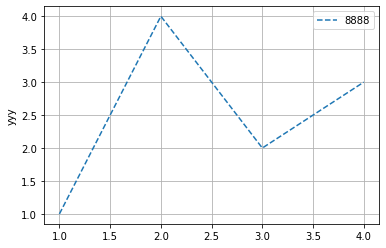

In [10]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3],'--', label="8888");  # Plot some data on the axes.
# plt.plot([1,2,3],[2,3,4])
plt.ylabel('yyy')
ax.grid()
plt.legend()

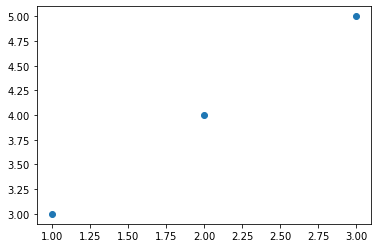

In [11]:
plt.scatter([1,2,3],[3,4,5])

### `Figure`的组成部分

In [1]:
%%HTML
<img src="./Sketch_Map.png" style="zoom:30%" />

1. `Figure`<br>
`Figure`往往包含多个子轴对象`Axes`和多组特殊的`Artist`对象（如`title`,`legend`,`colorbar`等等）。最简单创建`Figure`对象的方式是用`pyplot`函数。

2. `Axes`<br>
`Axes`是依附于`Figure`的包含画图数据的`Artist`对象，通常包含两个（或三个，对于3维情况）`Axis`对象，而`Axis`对象为画图的数据提供了标度。对于二维`Axes`可以通过`set_title()`设置标题，通过`set_xlabel()` `set_ylabel`设置x轴y轴的标签。

3. `Axis`<br>
`Axis`对象可以设置轴的范围和标度以及标度的标签。标度的位置由`Locator`对象确定，标度的标签的字符由`Formatter`对象生成。

4. `Artist`<br>
基本上，图上所有可见的都是`Artist`对象。`Artist`分为容器（container）和图元（primitive）两种类型。正如我在上一节写到的，matplotlib 层级结构的三个组件——`Figure`、`Axes` 和 `Axis` 都是容器，可以容纳更低一级的容器和复数个图元，例如由 `ax.plot` 创建的` Line2D`、`ax.scatter` 创建的 `PathCollection`，或 `ax.annotate` 创建的 `Text`。事实上，连刻度线和刻度标签都是 `Line2D` 和 `Text`，并且隶属于第四种容器 `Tick`。

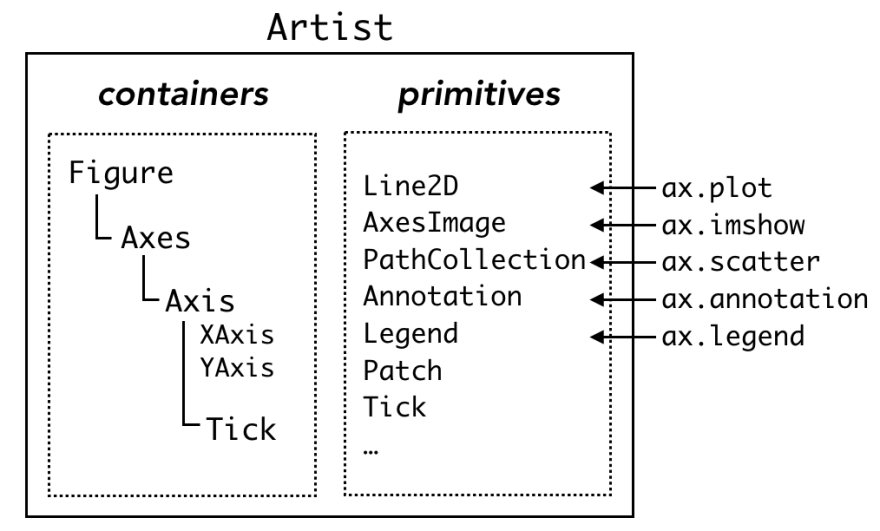

### 两种风格不同的画图方式

1. 面向对象的API接口(the "object-oriented (OO) style") <br>
显性的创建`Figure`和`Axes`对象，`ax.plot`进行画图。
2. Pyplot接口 <br>
通过Pyplot隐性的创建和管理`Figure`和`Axes`对象，`plt.plot`进行画图。

这两种风格有时也往往会混用。

----------

面向对象的方式：

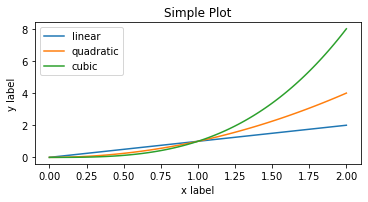

In [12]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

---------

Pyplot方式：

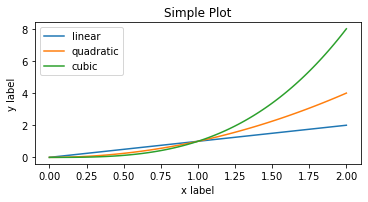

In [20]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

### 例：三角函数画图

In [13]:
x = np.linspace(-np.pi, np.pi) 
c, s = np.cos(x), np.sin(x) #生成三角函数

#### 常规默认画图

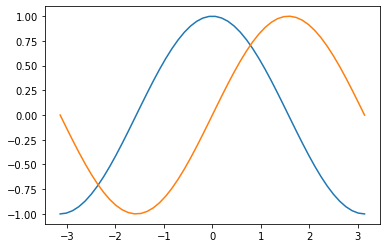

In [16]:
p = plt.plot(x,c)
p = plt.plot(x,s)

# 在脚本中需要加上这句才会显示图像
plt.show()

#### 设置图相关参数

图像以 `Figure #` 为窗口标题，并且数字从 1 开始，`figure()` 函数的主要参数如下：

参数 | 默认值 | 描述
---|---|---
`num`|`1`| 图号
`figsize`|`figure.figsize`| 图大小（宽，高）（单位英寸）
`dpi`|`figure.dpi`| 分辨率（每英寸所打印的点数）
`facecolor`|`figure.facecolor`| 背景颜色
`edgecolor`|`figure.edgecolor`| 边界颜色
`frameon` |`True`| 是否显示图框架

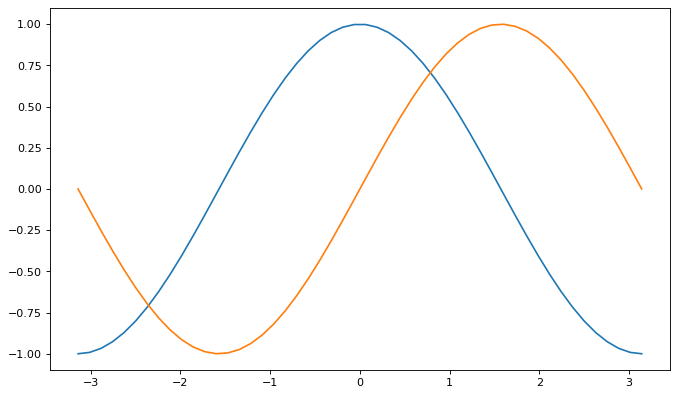

In [33]:
#设置图大小和分辨率

f = plt.figure(figsize=(10,6), dpi=80)

p = plt.plot(x,c)
p = plt.plot(x,s)

# 在脚本中需要加上这句才会显示图像
plt.show()

#### 设置线条颜色，粗细，类型

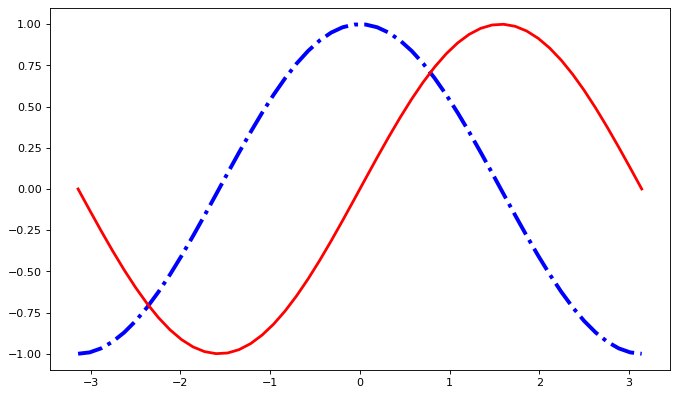

In [18]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
p = plt.plot(x, c, color="blue", linewidth=3.5, linestyle="-.")
p = plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")

# 在脚本中需要加上这句才会显示图像
# plt.show()

##### 字符参数

表示颜色的字符参数有：

字符 | 颜色
-- | -- 
`‘b’`|	蓝色，blue
`‘g’`|	绿色，green
`‘r’`|	红色，red
`‘c’`|	青色，cyan
`‘m’`|	品红，magenta
`‘y’`|	黄色，yellow
`‘k’`|	黑色，black
`‘w’`|	白色，white

表示类型的字符参数有：

字符|类型 | 字符|类型
---|--- | --- | ---
`  '-'	`| 实线 | `'--'`|	虚线
`'-.'`|	虚点线 | `':'`|	点线
`'.'`|	点 | `','`| 像素点
`'o'`	|圆点 | `'v'`|	下三角点
`'^'`|	上三角点 | `'<'`|	左三角点
`'>'`|	右三角点 | `'1'`|	下三叉点
`'2'`|	上三叉点 | `'3'`|	左三叉点
`'4'`|	右三叉点 | `'s'`|	正方点
`'p'`	| 五角点 | `'*'`|	星形点
`'h'`|	六边形点1 | `'H'`|	六边形点2 
`'+'`|	加号点 | `'x'`|	乘号点
`'D'`|	实心菱形点 | `'d'`|	瘦菱形点 
`'_'`|	横线点 | |

#### 设置横轴纵轴的区域范围

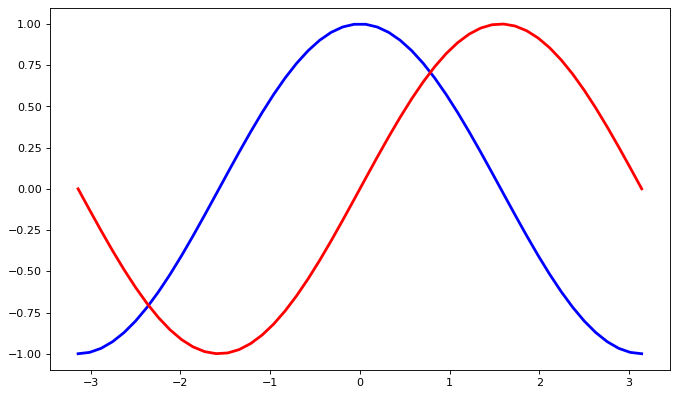

In [36]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
p = plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
p = plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")

# 设置显示范围
p = plt.xlim(x.min() * 1.1, x.max() * 1.1)
p = plt.ylim(c.min() * 1.1, c.max() * 1.1)


#### 设置刻度

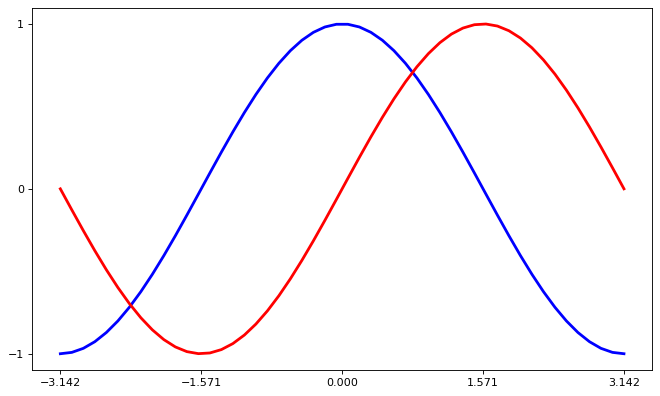

In [37]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
p = plt.plot(x, c, 'b-', 
         x, s, 'r-', linewidth=2.5)

# 设置显示范围
plt.xlim(x.min() * 1.1, x.max() * 1.1)
plt.ylim(c.min() * 1.1, c.max() * 1.1)


# 设置刻度
p = plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
p = plt.yticks([-1, 0, 1])

#### 设定 x 轴 y 轴标度
我们想让刻度的位置显示的是含有 $\pi$ 的标识而不是浮点数，可以在 `xticks` 中传入第二组参数，这组参数代表对应刻度的显示标识。这里，我们使用 `latex` 的语法来显示特殊符号（使用 `$$` 包围的部分）：

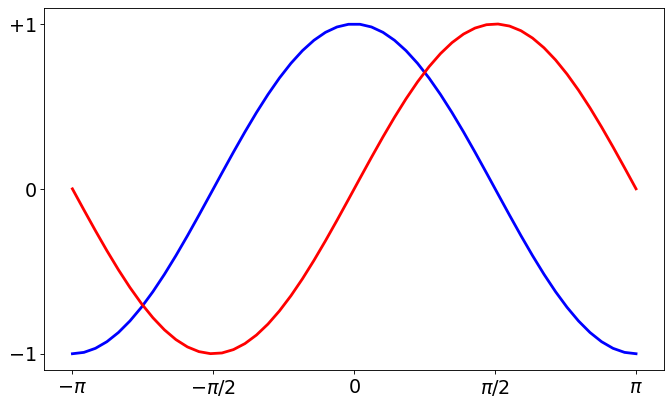

In [38]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
p = plt.plot(x, c, 'b-', 
         x, s, 'r-', linewidth=2.5)

# 设置显示范围
plt.xlim(x.min() * 1.1, x.max() * 1.1)
plt.ylim(c.min() * 1.1, c.max() * 1.1)

# 设置刻度及其标识
p = plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
               ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'], fontsize ='xx-large')
p = plt.yticks([-1, 0, 1], 
               ['$-1$', '$0$', '$+1$'], fontsize ='xx-large')

#### 移动坐标轴的位置
现在坐标轴的位置是在边界上，而且有上下左右四条，我们现在想将下面和左边的两条移动到中间，并将右边和上面的两条去掉：

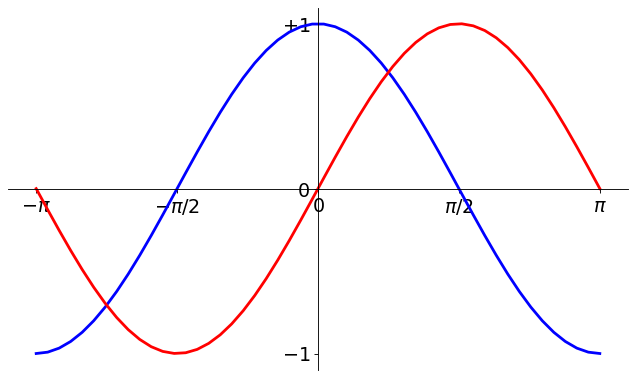

In [39]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
plt.plot(x, c, 'b-', 
         x, s, 'r-', linewidth=2.5)

# 设置显示范围
plt.xlim(x.min() * 1.1, x.max() * 1.1)
plt.ylim(c.min() * 1.1, c.max() * 1.1)

# 得到轴的句柄
ax = plt.gca()
# ax.spines参数表示四个坐标轴线
# 将右边和上边的颜色设为透明
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 将 x 轴的刻度设置在下面的坐标轴上
ax.xaxis.set_ticks_position('bottom')
# 设置位置
ax.spines['bottom'].set_position(('data',0))

# 将 y 轴的刻度设置在左边的坐标轴上
ax.yaxis.set_ticks_position('left')
# 设置位置
ax.spines['left'].set_position(('data',0))

# 设置刻度及其标识
p = plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
           ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'], fontsize ='xx-large')
p = plt.yticks([-1, 0, 1], 
           ['$-1$', '$0$', '$+1$'], fontsize ='xx-large')

#### 加入图例

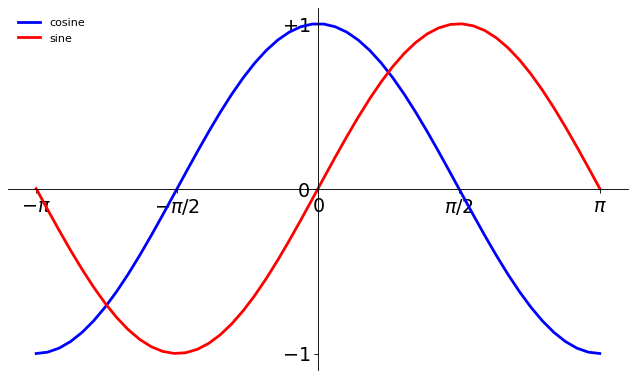

In [40]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
plt.plot(x, c, 'b-', 
         x, s, 'r-', linewidth=2.5)

# 设置显示范围
plt.xlim(x.min() * 1.1, x.max() * 1.1)
plt.ylim(c.min() * 1.1, c.max() * 1.1)

# 得到轴的句柄
ax = plt.gca()
# ax.spines参数表示四个坐标轴线
# 将右边和上边的颜色设为透明
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 将 x 轴的刻度设置在下面的坐标轴上
ax.xaxis.set_ticks_position('bottom')
# 设置位置
ax.spines['bottom'].set_position(('data',0))

# 将 y 轴的刻度设置在左边的坐标轴上
ax.yaxis.set_ticks_position('left')
# 设置位置
ax.spines['left'].set_position(('data',0))

# 设置刻度及其标识
p = plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
           ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'], fontsize ='xx-large')
p = plt.yticks([-1, 0, 1], 
           ['$-1$', '$0$', '$+1$'], fontsize ='xx-large')

# 加入图例，frameon表示去掉图例周围的边框
l = plt.legend(['cosine', 'sine'], loc='upper left', frameon=False)

#### 注释特殊点

我们可以使用 `annotate` 函数来注释特殊的点，假设我们要显示的点是 $2\pi/3$：

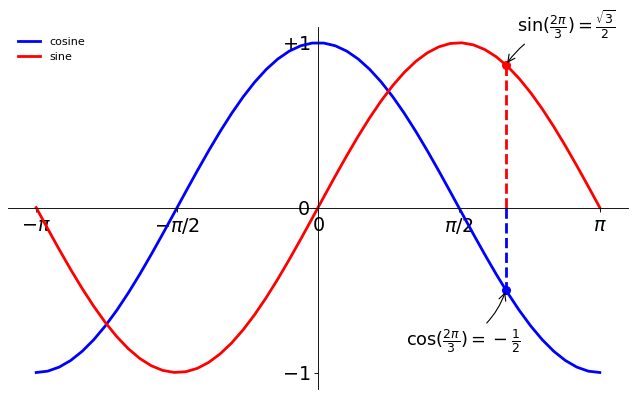

In [44]:
# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=80)

# 画图，指定颜色，线宽，类型
plt.plot(x, c, 'b-', 
         x, s, 'r-', linewidth=2.5)

# 设置显示范围
plt.xlim(x.min() * 1.1, x.max() * 1.1)
plt.ylim(c.min() * 1.1, c.max() * 1.1)

# 得到轴的句柄
ax = plt.gca()
# ax.spines参数表示四个坐标轴线
# 将右边和上边的颜色设为透明
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 将 x 轴的刻度设置在下面的坐标轴上
ax.xaxis.set_ticks_position('bottom')
# 设置位置
ax.spines['bottom'].set_position(('data',0))

# 将 y 轴的刻度设置在左边的坐标轴上
ax.yaxis.set_ticks_position('left')
# 设置位置
ax.spines['left'].set_position(('data',0))

# 设置刻度及其标识
p = plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
           ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'], fontsize ='xx-large')
p = plt.yticks([-1, 0, 1], 
           ['$-1$', '$0$', '$+1$'], fontsize ='xx-large')

# 加入图例，frameon表示去掉图例周围的边框
l = plt.legend(['cosine', 'sine'], loc='upper left', frameon=False)

# 数据点
t = 2 * np.pi / 3

# 蓝色虚线
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=2.5, linestyle="--")

# 该点处的 cos 值
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

# 在对应的点显示文本
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', # 文本
             xy=(t, np.sin(t)), # 数据点坐标位置
             xycoords='data',   # 坐标相对于数据
             xytext=(+10, +30), # 文本位置坐标
             textcoords='offset points', # 坐标相对于数据点的坐标
             fontsize=16,       # 文本大小
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) # 箭头

# 红色虚线
p = plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")

# 该点处的 sin 值
p = plt.scatter([t,],[np.sin(t),], 50, color ='red')

# 显示文本
p = plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# 保存图片
plt.savefig('trigonometric_function.png')

### 补充

#### Matplotlib 绘制多图

我们可以使用Pyplot中的 `subplot()` 和`subplots()`方法来绘制多个子图。

`subplot()`方法在绘图时需要指定位置，`subplots()`方法可以一次生成多个，在调用时只需要调用生成对象的`Axes`即可。

------
```python
plt.subplot(nrows,ncols,index,**kwargs)
```
函数将整个绘图区域分成 nrows 行和 ncols 列，然后从左到右，从上到下的顺序对每个子区域进行编号 1...N ，左上的子区域的编号为 1、右下的区域编号为 N，编号可以通过参数 index 来设置。设置 numRows ＝ 1，numCols ＝ 2，就是将图表绘制成 1x2 的图片区域。

Text(0.5, 0.98, 'Title')

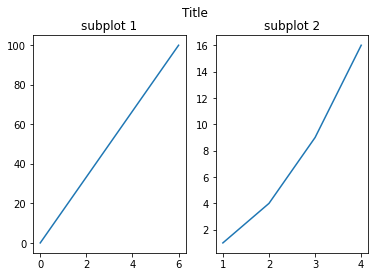

In [47]:
#plot 1:
xpoints = np.array([0, 6])
ypoints = np.array([0, 100])

plt.subplot(1, 2, 1)
plt.plot(xpoints,ypoints)
plt.title("subplot 1")

#plot 2:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.subplot(1, 2, 2)
plt.plot(x,y)
plt.title("subplot 2")

plt.suptitle("Title")

--------
```python
plt.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None)
```
nrows 与 ncols 表示两个整数参数，它们指定子图所占的行数、列数。函数的返回值是一个元组，包括一个图形对象和所有的`Axes`对象。其中`Axes`对象的数量等于 nrows * ncols，且每个` Axes `对象均可通过索引值访问（从1开始）

Text(0.5, 1.0, 'log')

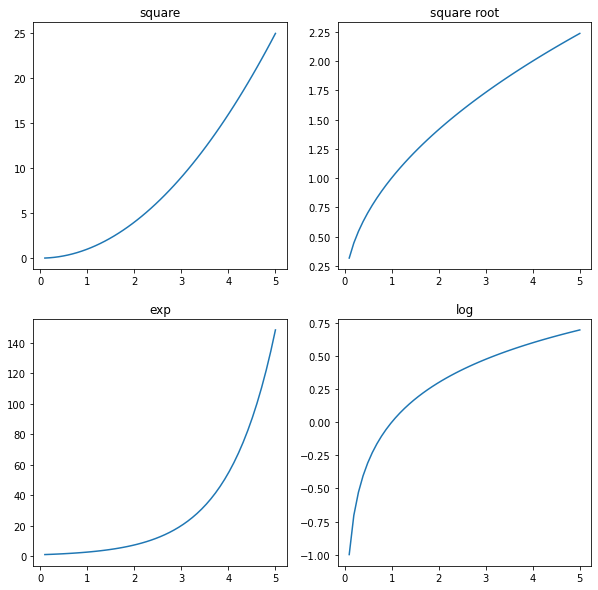

In [51]:
import matplotlib.pyplot as plt
fig, a =  plt.subplots(2,2,figsize =(10,10))
import numpy as np
x = np.linspace(0.1,5,51)
#绘制平方函数
a[0][0].plot(x,x*x)
a[0][0].set_title('square')
#绘制平方根图像
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
#绘制指数函数
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')
#绘制对数函数
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')

更高级的可以用 `gridspec` 来绘图。

#### 数学表达式

在字符串中使用一对 `$$` 符号可以利用 `Tex` 语法打出数学表达式，而且并不需要预先安装 `Tex`。在使用时我们通常加上 `r` 标记表示它是一个原始字符串（raw string）

- 希腊字母和特殊符号可以用 '\ + 对应的名字' 来显示
- `{}` 中的内容属于一个部分；要打出花括号是需要使用 `\{\}
- 使用 `_` 和 `^` 表示上下标

例子：
$\alpha_i > \beta_i$：

    r'$\alpha_i > \beta_i$'

$\sum\limits_{i=0}^\infty x_i$：

    r'$\sum_{i=0}^\infty x_i$'
    

-------
特殊字体：
默认显示的字体是斜体，不过可以使用以下方法显示不同的字体：

命令|显示
--|--
\mathrm{Roman}|$\mathrm{Roman}$
\mathit{Italic}|$\mathit{Italic}$
\mathtt{Typewriter}|$\mathtt{Typewriter}$
\mathcal{CALLIGRAPHY}|$\mathcal{CALLIGRAPHY}$
\mathbb{blackboard}|$\mathbb{blackboard}$
\mathfrak{Fraktur}|$\mathfrak{Fraktur}$
\mathsf{sansserif}|$\mathsf{sansserif}$

$s(t) = \mathcal{A}\ \sin(2 \omega t)$：

    s(t) = \mathcal{A}\ \sin(2 \omega t)

注：

- Tex 语法默认忽略空格，要打出空格使用 `'\ '`
- \sin 默认显示为 Roman 字体

特殊字符表参见：https://matplotlib.org/stable/tutorials/text/mathtext.html

---

#### 其他各种图例（柱状图，热力图，扇形图等）
[matplotlib官方示例](https://matplotlib.org/stable/gallery/index.html)

## [Pandas](https://pandas.pydata.org/)

### 简介
Pandas 是 Python 语言的一个扩展程序库，用于数据分析,名字衍生自术语 "panel data"（面板数据）和 "Python data analysis"（Python 数据分析）。

其特点在于：

* Pandas 一个强大的分析结构化数据的工具集，基础是 Numpy（提供高性能的矩阵运算）。

* Pandas 可以从各种文件格式比如 CSV、JSON、SQL、Microsoft Excel 导入数据。

* Pandas 可以对各种数据进行运算操作，比如归并、再成形、选择，还有数据清洗和数据加工特征。



In [20]:
import pandas as pd

要使用pandas，需要得熟悉两个主要数据结构：Series和DataFrame。虽然它们并不能解决所有问题，但它们为大多数应用提供了一种可靠的、易于使用的基础。

### Series
Series是一种类似于一维数组的对象，可以看成表格中的一个列（column），可以保存任何数据类型，它由一组数据（各种Numpy数据类型）以及一组与之相关的数据标签（即索引）组成。

```python
pd.Series(data, index, dtype, name, copy)
```
其中data为一组数据()，index为数据标签索引（未指定，默认从0开始），name为数据名称。

In [21]:
import numpy as np

In [22]:
s1 = pd.Series([3.4,np.nan,7,2.5,5])
print(s1)

0    3.4
1    NaN
2    7.0
3    2.5
4    5.0
dtype: float64


In [23]:
package = {0:"Pandas",1:'Numpy',2:'Scipy',3:'Matplotlib'}
s2 = pd.Series(package,index = [0,3],name = 'Lecture3')
print(s2)

0        Pandas
3    Matplotlib
Name: Lecture3, dtype: object


### DataFrame

DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。

```python
pd.DataFrame( data, index, columns, dtype, copy)
```
其中data为数据，index为索引值（行标签），columns为列标签。

In [25]:
dates = pd.date_range('2022.10.01',periods=7)

In [26]:
df = pd.DataFrame(36+np.random.rand(7,3),index = dates,columns= ['6:00','12:00','18:00'])
print(df)

                 6:00      12:00      18:00
2022-10-01  36.057598  36.935108  36.115776
2022-10-02  36.541742  36.161250  36.266246
2022-10-03  36.395092  36.659796  36.266613
2022-10-04  36.592094  36.152954  36.727713
2022-10-05  36.384411  36.848966  36.760716
2022-10-06  36.285954  36.329126  36.906399
2022-10-07  36.362689  36.811581  36.537055


In [37]:
df.iloc[0,1]

36.93510778549036

##### test1

In [27]:
pendulum_length1 = np.array([93.39,93.37,93.38,93.37,93.38])
index = ['measuring1','measuring2','measuring3','measuring4','measuring5']
experiment_data1 = pd.Series(pendulum_length1,index = index)
print(experiment_data1)

measuring1    93.39
measuring2    93.37
measuring3    93.38
measuring4    93.37
measuring5    93.38
dtype: float64


---------------

### 当堂作业    
- 自学`ipwidgets`这种交互式可视化工具；    
- 处理问题：对如下含参的矩阵$H(\Omega_1, \Omega_2)$，画出此矩阵对角化后的本征值随参数变化的图

\begin{eqnarray}
H(\Omega_1, \Omega_2) = 
-\frac{1}{2}\begin{pmatrix}
 0 & 0 &\Omega_1 \\
 0&0&\Omega_2 \\ 
 \Omega_1 &\Omega_2 & 0
 \end{pmatrix}.
\end{eqnarray}
    
    - 固定 $\Omega_1=1$， 变化$\Omega_2$, 画出三个本征值随$\Omega_2$的变化(`lineplot`);
    - 比如可以是二维的 `colormap` 图；   
    - 可以用交互式的方式

- 写一个函数实现如下要求并可视化：
    - 输入:一个任意一个维度$(3,1)$的数组，元素是任意复数，我把它记做 $|\Psi(t=0)\rangle=(c_1, c_2, c_3)^T$, 满足：$\langle\Psi|\Psi\rangle=1.$    
    - 输出: 记做 $|\Psi(t)\rangle = e^{-iHt}|\Psi(t=0)\rangle$, 对 $|\Psi(t)\rangle$计算三个分量的模平方和$t$的关系。即 $|c_i|^2(t), i=1,2,3$ 。
    - \[Note\]:使用你觉得好的表现方式。   

> **把问题转化为关键词，检索$\rightarrow$筛选有用信息$\rightarrow$操作理解**。（积累经验）     
